# 뉴럴 네트워크 play ground 모방

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
m = 500
x1 = np.random.rand(m) * 12 - 6
x2 = np.random.rand(m) * 12 - 6
X = np.stack((x1,x2), axis=1)  # (100, 2)
x1.min(), x1.max(), X.shape

(-5.957774332337621, 5.975292247569572, (500, 2))

In [24]:
y = np.sqrt(x1**2 + x2**2) < 4
1 - np.mean(y)

0.6659999999999999

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(x1, x2, c=y)

In [ ]:
#학습 실패
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)
model.score(X,y)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [29]:
xx = pf.fit_transform(X)
xx.shape, pf.get_feature_names()

((500, 6), ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'])

In [31]:
# 다항특성을 추가하면 분류 성공
model = LogisticRegression().fit(xx,y)
model.score(xx,y),model.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.988, array([[ 4.08399728e+00,  3.67990434e-02, -1.14548418e-02,
         -5.45320627e-01,  2.58140735e-04, -5.30553528e-01]]))

## 히든 레이어 1개(노드 5개) 추가

X: 2 개 특징
히든1 : 5 개 특징
출력 : 1개 > sigmoid > 확률

In [33]:
X.shape, y.shape

((500, 2), (500,))

In [35]:
y = np.reshape(y, [-1, 1])
y.shape

(500, 1)

In [179]:
W1 = tf.Variable(tf.random_normal(shape=[2, 5])) # X > hidden 
b1 = tf.Variable(tf.random_normal(shape=[5])) 
W2 = tf.Variable(tf.random_normal(shape=[5, 1])) # hidden > out
b2 = tf.Variable(tf.random_normal(shape=[1])) 
hidden = tf.sigmoid(tf.matmul(tf.cast(X, tf.float32), W1) + b1)
out = tf.sigmoid(tf.matmul(hidden, W2) + b2)
gt = tf.cast(y, tf.float32) #정답 ground_truth
cost = - tf.reduce_mean(gt * tf.log(out) + (1-gt) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(gt, tf.round(out)) ,tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

In [ ]:
for i in range(10000):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)    
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

### 인구조사 연수입 5천만 이상(1), 이하(0) 분류 
- sklearn 으로 기본 성능 측정
- tensorflow 로 히든 없이/넣고 비교해서 히든 레이어를 넣으면 성능이 올라가는지 확인

In [3]:
import pandas as pd
df = pd.read_csv('./datasets/adult.data', header=None)
df.shape

(32561, 15)

In [4]:
df_valid = df.drop(columns=2)

In [5]:
set(df_valid[14])

{' <=50K', ' >50K'}

In [ ]:
df_dum = pd.get_dummies(df_valid)
df_dum.head(1)

In [9]:
x = np.array(df_dum.iloc[:, :-2]).astype(np.float32)
y = np.array(df_dum.iloc[:, -1:])
x.shape, y.shape, y.mean()

((32561, 107), (32561, 1), 0.2408095574460244)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x, y)
print('accuracy', model.score(x, y))# 85%

In [34]:
W1 = tf.Variable(tf.random_normal(shape=[107,1])) # X > out
b1 = tf.Variable(tf.random_normal(shape=[1])) 
xn = x / np.max(x, axis=-1, keepdims=True)
out = tf.sigmoid(tf.matmul(xn, W1) + b1)
gt = tf.cast(y, tf.float32) #정답 ground_truth
cost = - tf.reduce_mean(gt * tf.log(out) + (1-gt) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(gt, tf.round(out)) ,tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

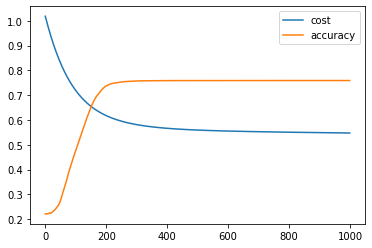

In [44]:
for i in range(100):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)    
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

네트워크가 깊다 : 히든 레이어가 많다
네트워크가 넓다 : 히든 레이어에 노드가 많다.
데이터가 많을 때는 깊고 넓어질 수록 성능이 좋아집니다.
데이터가 적을 때 깊고 넓어지면 오버피팅!

In [69]:
W1 = tf.Variable(tf.random_normal(shape=[107,100])) # X > hidden
b1 = tf.Variable(tf.random_normal(shape=[100])) 
W2 = tf.Variable(tf.random_normal(shape=[100,50]))
b2 = tf.Variable(tf.random_normal(shape=[50])) 
W3 = tf.Variable(tf.random_normal(shape=[50,1])) # k 개
b3 = tf.Variable(tf.random_normal(shape=[1])) 
xn = x / np.max(x, axis=-1, keepdims=True)
h1 = tf.sigmoid(tf.matmul(xn, W1) + b1)
h2 = tf.sigmoid(tf.matmul(h1, W2) + b2)
out = tf.sigmoid(tf.matmul(h2, W3) + b3) # softmax 
gt = tf.cast(y, tf.float32) #정답 ground_truth
cost = - tf.reduce_mean(gt * tf.log(out) + (1-gt) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(gt, tf.round(out)) ,tf.float32))#argmax
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

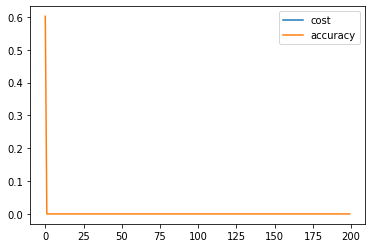

In [68]:
for i in range(100):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)    
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

In [71]:
!pip install keras # 딥러닝 front end 라이브러리, 단독 사용 불가(tensorflow)

In [2]:
import keras

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [79]:
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

Text(0.5, 1.0, '9')

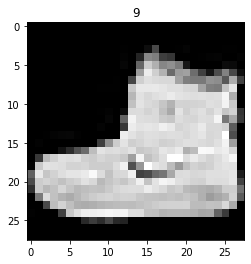

In [85]:
x0 = x_train[0]
plt.imshow(x0, cmap='gray')
plt.title(str(y_train[0]))

Text(0.5, 1.0, '9')

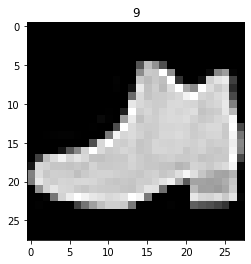

In [100]:
index = 15
x0 = x_train[index]
plt.imshow(x0, cmap='gray')
plt.title(str(y_train[index]))

In [101]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [103]:
x_train.shape

(60000, 28, 28)

In [4]:
m = 1000  # 데이터 제한 
x = np.reshape(x_train, [60000, 28*28])[:m]
y = y_train[:m]
x.shape, y.shape

((1000, 784), (1000,))

##  사이킷런으로 먼저 분류정확도를 측정해보세요

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x,y)
model.score(x,y)

In [39]:
K = 10 # 클래스 종류 
W1 = tf.Variable(tf.random_normal(shape=[784,100])) # X > hidden
b1 = tf.Variable(tf.random_normal(shape=[100])) 
W2 = tf.Variable(tf.random_normal(shape=[100,K])) # K
b2 = tf.Variable(tf.random_normal(shape=[K])) # K 
x = x.astype(np.float32)
xn = x / np.max(x, axis=-1, keepdims=True)
h1 = tf.sigmoid(tf.matmul(xn, W1) + b1)
out = tf.nn.softmax(tf.matmul(h1, W2) + b2) # softmax 
gt = tf.one_hot(y, depth=K) # 원핫 인코딩 
cost = - tf.reduce_mean(gt * tf.log(out) + (1-gt) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(
    tf.cast(y,tf.int64), tf.arg_max(out,-1)) ,tf.float32))#argmax
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

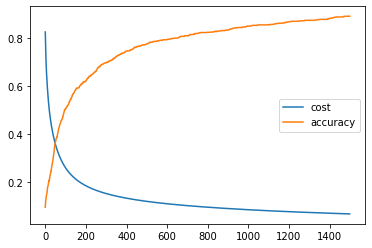

In [54]:
for i in range(100):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)    
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()